In [61]:
import pandas as pd
from prophet import Prophet


In [62]:
df_ini = pd.read_csv("df_total_values.csv")

In [63]:
df_prophet = df_ini[["year", "values_year"]]

In [64]:
df_prophet.rename(columns={'year': 'ds', 'values_year': 'y'}, inplace=True)

df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

C:\Users\Iván\AppData\Local\Temp\ipykernel_1780\2562440757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet.rename(columns={'year': 'ds', 'values_year': 'y'}, inplace=True)
C:\Users\Iván\AppData\Local\Temp\ipykernel_1780\2562440757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')


In [65]:
m = Prophet()
m.fit(df_prophet)

15:55:24 - cmdstanpy - INFO - Chain [1] start processing
15:55:24 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
367,2019-12-28
368,2019-12-29
369,2019-12-30
370,2019-12-31
371,2020-01-01


In [67]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,12000.771383,-44498.383935,68360.506376
1,2014-01-01,11943.080778,-41409.947781,64395.960638
2,2015-01-01,11877.676143,-44075.973634,70364.836706
3,2016-01-01,11804.679687,-42879.561528,72032.630478
4,2017-01-01,12115.437745,-47603.794404,68612.184772
...,...,...,...,...
367,2019-12-28,9386.421168,-46857.620332,67447.870380
368,2019-12-29,10160.558558,-43928.481089,64315.796735
369,2019-12-30,10849.281744,-43748.269704,70387.169734
370,2019-12-31,11439.350753,-50275.088362,66377.646731


c:\Anaconda\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Anaconda\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


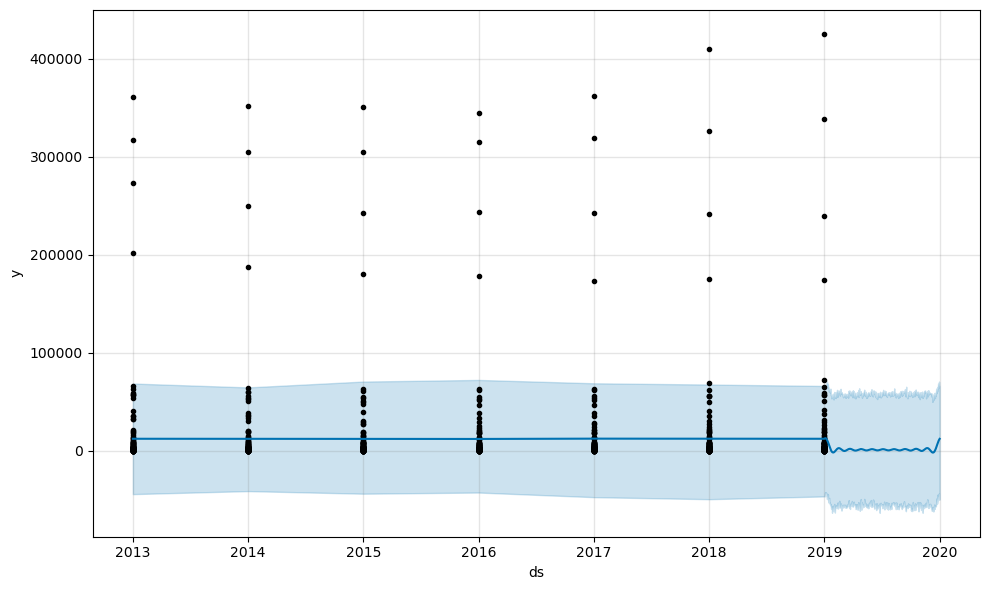

In [68]:
fig1 = m.plot(forecast)

c:\Anaconda\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Anaconda\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Anaconda\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.t

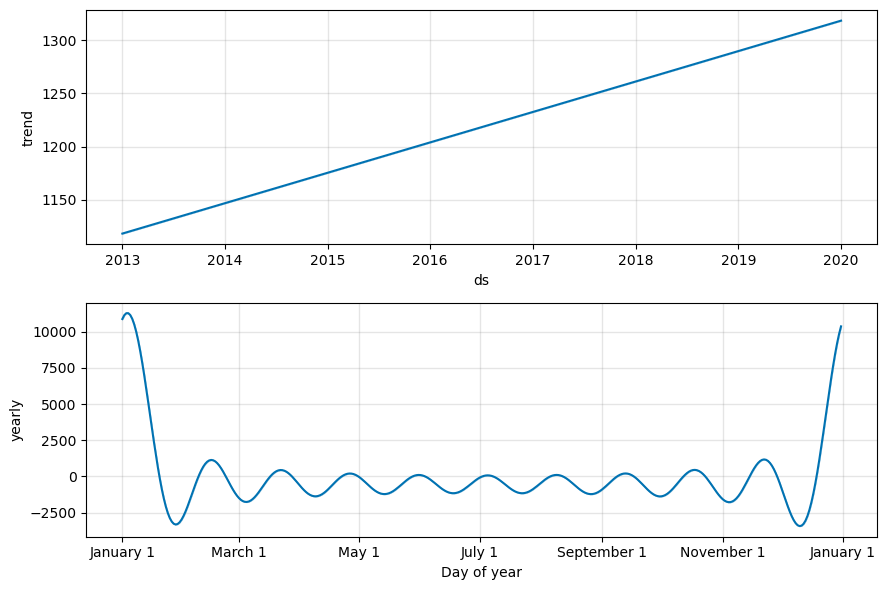

In [69]:
fig2 = m.plot_components(forecast)